# Text Mining Lesson

This is the first hands-on exercise for doing some text mining.

First we'll check that the python is working ok and call a print statement.

In [115]:
print("Hello World")

Hello World


## Download Files

Need to add something about how to download the data here!

## Import packages etc.

Expand here on use of libraries and packages.

For this course we need to import a few libraries into Python. NLTK is the tool which we'll be using to do much of the text processing in this workshop so we need to import ```nltk``` (see below). We'll also use ```numpy``` to represent information in arrays and matrices, ```string``` to processing some strings and ```matplotlib``` to visualise the output.

In [74]:
import nltk # https://www.nltk.org/install.html
import numpy # https://www.scipy.org/install.html
import matplotlib.pyplot
import string

## Tokenising a piece of text
In order to process text we need to break it down into tokens.  A token is a word or punctuation.

To tokenise we first need to import the ```word_tokenize``` method from the ```tokenize``` package from NLTK which allows us to do this easily.

In [2]:
from nltk.tokenize import word_tokenize

Now we can specify a bit of text as a string and tokenise it.  We will save the tokenised output in a list of tokens (sub-strings) using the ```tokens``` variable. We can inspect this list by inspecting the ```tokens``` variable.

In [116]:
my_string = "Humpty Dumpty sat on a wall, Humpty Dumpty had a great fall; All the king's horses and all the king's men Couldn't put Humpty together again."
tokens = word_tokenize(my_string)
# Show first 10 entries of the tokens list
tokens[:10]

['Humpty', 'Dumpty', 'sat', 'on', 'a', 'wall', ',', 'Humpty', 'Dumpty', 'had']

We can lowercase the strings in the list by going through it and calling the ```.lower()``` method on each entry. We do this by using a for loop to loop through each word in the list.

In [4]:
lc_tokens = [word.lower() for word in tokens]
# Show first 10 entries of the lowercased tokens list
lc_tokens[:5]

['humpty', 'dumpty', 'sat', 'on', 'a']

Now, let's load a file on your local machine, tokenise and lowercase it.

In [5]:
# The open() method can be used to open a file (you need to specify the path to the file and 
# the mode of opening it ('r' for read))
# The read() method is used to read the file and you can store it in a string variable called "raw".
f = open('./Downloads/india-papers-sample/74457530/out/74442100.34.txt','r')
raw = f.read()
file_tokens = word_tokenize(raw)
lc_file_tokens = [word.lower() for word in file_tokens]
lc_file_tokens[:10]

['rawal', 'pindi', 'leper', 'asylum', '.', 'result', 'of', 'one', 'year', "'s"]

We can do the same for a collection of documents.  For example, choose a collection of raw text documents in a given directory.  To read them we can use the ```PlaintextCorpusReader``` class provided in the ```corpus``` package of NLTK.  You need to specify the collection directory name and a wildcard for which files to read in the directory.  Using the ```words()``` method, the text is automatically tokenised and stored in a list of words. As before, we can then lowercase the words in the list.

In [6]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = './Downloads/india-papers-sample/74457530/out/'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
tokens = wordlists.words()
tokens[:10]

['No', '.', '1111', '(', 'Sanitary', '),', 'dated', 'Ootacamund', ',', 'the']

In [7]:
lc_tokens = [word.lower() for word in tokens]
lc_tokens[:10]

['no', '.', '1111', '(', 'sanitary', '),', 'dated', 'ootacamund', ',', 'the']

## Concordances of tokens in text
Next, we will display concoordances for a particular token, i.e. all contexts a particular token appears in. We can do this using the ```Text``` class in NLTK's ```text``` package.  We can represent our list of lowercased tokens in the document collection loaded previously using the Text class.  The concordance list of a token can be displayed using the ```concordance()``` method on this class as shown below.

In [106]:
from nltk.text import Text
t = Text(tokens)
t.concordance('woman')

Displaying 19 of 19 matches:
s of age , a sweeper , who married a woman who had leprosy , and at the age of 
e of Sitabu , aged 40 , a Muhammadan woman . Her grand - father and father were
ung man deliberately married a leper woman , and became himself a leper at the 
contrary . In No . 6 a man marries a woman whose grandfather and father had bee
 lepers . In No . 10 a man marries a woman whose father had died of leprosy . I
applies to these cases . In No . 2 a woman marries a man whose father and elder
n in the case of a man who marries a woman of notoriously leper family . In No 
toriously leper family . In No . 5 a woman marries a man whose elder brother wa
d continued to cohabit with a Native woman after she had been attacked with lep
isen from intermarriage of a man and woman in both of whom leprosy was heredita
een accompanied by a healthy looking woman , and by this means , although all h
editary transmission . In one case a woman got the disease about two years afte
 passed the

Task 1: Change the word "woman" to other words and rerun to see how the context changes accordingly.
    
Task 2: Do the same to the text prior to lowercasing.

In [12]:
t = Text(lc_tokens)
t.concordance('he')
# The previous command only prints the first 25 results (or less if there are less), to print more lines,
# specify the number of lines, e.g. t.concordance('he',lines=161)

Displaying 25 of 161 matches:
prosy treated by gurjun . oil , which he was able to watch for a length of tim
 diminished . during these two months he gained three pounds in weight , which
does not seem much , considering that he did no work and was fairly well fed o
se from jail on the 23rd january 1876 he was again suffering from the sores th
n 5th and died on 20th october 1875 . he was seriously ill when he was brought
ober 1875 . he was seriously ill when he was brought to the hospital , and cou
itted on the 8th september 1875 , and he went home of his own accord on 20th d
is own accord on 20th december 1875 . he was much improved under treat - ment 
evalence of leprosy in the district , he had had but very few opportunities of
even half this number . the natives , he says , call every chronic skin diseas
in the legs , the feet and the ears , he has perfect taste , hearing , sight a
te laboured under it . the leper says he was quite free from leprosy until he 
 he was quite free fro

## Counting tokens in text

You can also do other useful things like count the number of tokens in a text, determine the number and percentage count of particular tokens and plot the count distributions as a graph. To do this we have to import the ```FreqDist``` class from the NLTK ```probability``` package.

In [90]:
from nltk.probability import FreqDist
fdist = FreqDist(lc_tokens)
fdist

FreqDist({'the': 5793, ',': 5395, '.': 5175, 'of': 3806, 'in': 2021, 'and': 1988, 'to': 1862, 'is': 1070, 'a': 1033, '-': 833, ...})

In [89]:
# Count the total number of tokens in a corpus using the N() method
fdist.N()

92376

In [61]:
# Count the number of times a token appears in a corpus
fdist['she']

26

Task 3: Change the word to see how the frequency changes.

In [87]:
# Determine relative frequency of a token in a corpus (% in the corpus)
fdist.freq('she')

0.0002814583874599463

## Frequency distributions

The ```plot()``` method can be called to draw the frequency distribution for the tokens in the text, either by counts or cumulatively.

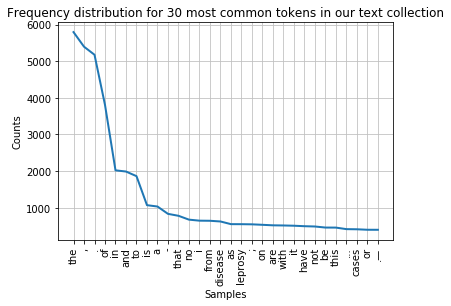

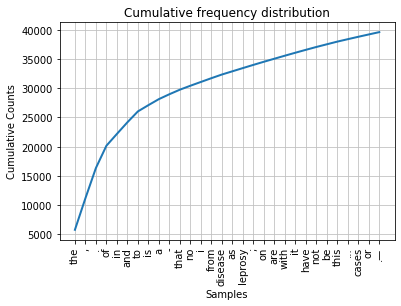

In [84]:
fdist.plot(30,title='Frequency distribution for 30 most common tokens in our text collection')
fdist.plot(30,title='Cumulative frequency distribution',cumulative=True)

You can see that the distributions contain a lot of non-content words (stop words) and punctuation. We can remove them before drawing these graphs.  First, we need to import ```stopwords``` from the ```corpus``` package to be able to do this.  We can combine the list of stop words with a list of punctuation and single digits into a new list of strings to be ignored.

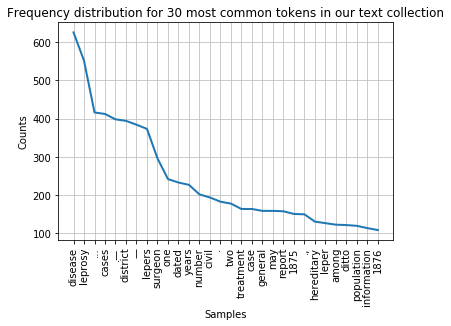

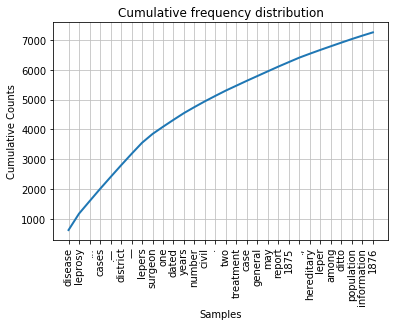

In [101]:
from nltk.corpus import stopwords 
removeThese = set(stopwords.words('english') + list(string.punctuation) + list(string.digits))
filtered_text = [w for w in lc_tokens if not w in removeThese]
fdist_filtered = FreqDist(filtered_text)
fdist_filtered.plot(30,title='Frequency distribution for 30 most common tokens in our text collection')
fdist_filtered.plot(30,title='Cumulative frequency distribution',cumulative=True)

Add description of the word cloud below.

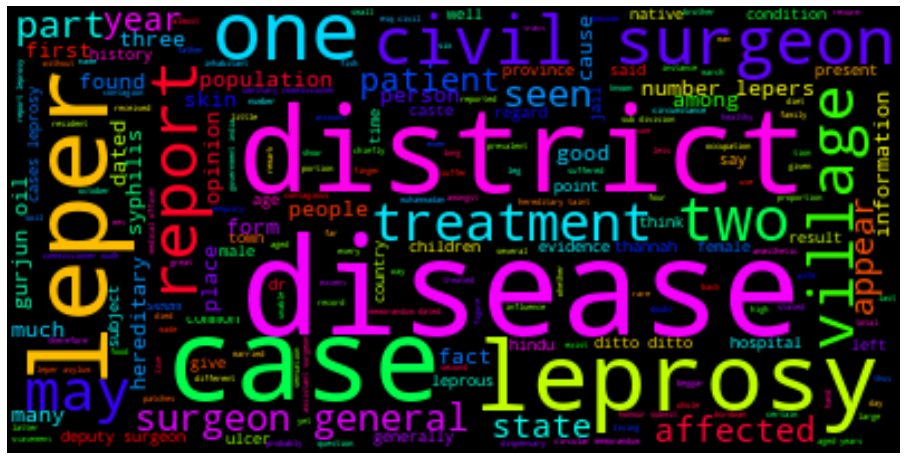

In [69]:
cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(filtered_text))
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Lexical Dispersion Plot

Note to change data set and update! Maybe American presidents

In [34]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Moreover, we can plot lexical dispersion of particular tokens.  DEFINITION HERE! This is particularly useful for a corpus that covers a longer time period and for which you want to analyse how specific terms were used more or less frequently over time.

To do this you need to import ```dispersion_plot``` and then run the method using the text t and the list of words under consideration.

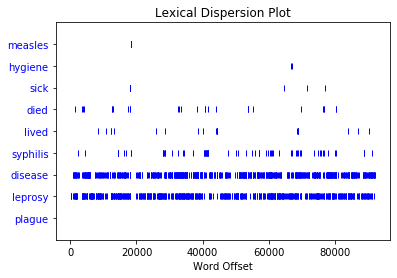

In [105]:
from nltk.draw.dispersion import dispersion_plot
dispersion_plot(t,["measles", "hygiene", "sick", "died", "lived", "syphilis", "disease","leprosy","plague"], ignore_case=True, title='Lexical Dispersion Plot')

## Searching text using regular expressions

Move this into concordance section!

In [94]:
import re
[w for w in tokens if re.search('^wom[ae]n$', w)][:10]

['women',
 'women',
 'women',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman',
 'woman']

## Finding similar words and collocations

Find out how this works and explain.

How could this be useful?

In [108]:
t.similar('measles')

leprosy have has he toes healed two syphilis gone sensation son
syphillis father anaesthetic mother grandfather suffered diarrhœa
dysentery


In [109]:
from nltk.collocations import *

In [110]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [111]:
finder = BigramCollocationFinder.from_words(ft, 5)

In [112]:
finder.apply_freq_filter(5)

In [113]:
finder.nbest(bigram_measures.likelihood_ratio, 10)

[('...', '...'),
 ('·', '·'),
 ('ditto', 'ditto'),
 ('civil', 'surgeon'),
 ('esq', '.,'),
 ('gurjun', 'oil'),
 ('.—', '.—'),
 ('surgeon', 'general'),
 ('deputy', 'circle'),
 ('deputy', 'general')]

BREAK LESSON HERE!

## Part-of-speech tagging

Explain what POS tagging is and how it's done.  And why you'd want it.

Start with new data set.

Double check variables, given them better names.

In [114]:
from nltk.tag import pos_tag

In [26]:
tokens = word_tokenize(raw)
tagged_tokens = nltk.pos_tag(tokens)

In [27]:
tagged_tokens[:20]

[('RAWAL', 'NNP'),
 ('PINDI', 'NNP'),
 ('LEPER', 'NNP'),
 ('ASYLUM', 'NNP'),
 ('.', '.'),
 ('Result', 'NNP'),
 ('of', 'IN'),
 ('one', 'CD'),
 ('year', 'NN'),
 ("'s", 'POS'),
 ('treatment', 'NN'),
 ('of', 'IN'),
 ('eleven', 'JJ'),
 ('cases', 'NNS'),
 ('by', 'IN'),
 ('Gurjun', 'NNP'),
 ('Oil', 'NNP'),
 ('and', 'CC'),
 ('one', 'CD'),
 ('case', 'NN')]

Add examples of things, like just give me nouns or adverbs.

## Named entity tagging

Explain what NER tagging is and why we need it.  

Add something on downloading the tagger and the model.

Fix variables. 

Explain the get_continuous_chunk method

In [120]:
from nltk.tag import StanfordNERTagger
nltk.download('gutenberg')
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /Users/balex/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [121]:
st = StanfordNERTagger('./Downloads/stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz',
'./Downloads/stanford-ner-2018-10-16/stanford-ner.jar',
encoding='utf-8')

In [122]:
ner_tagged_tokens = st.tag(tokens)
ner_tagged_tokens

[('Humpty', 'PERSON'),
 ('Dumpty', 'PERSON'),
 ('sat', 'O'),
 ('on', 'O'),
 ('a', 'O'),
 ('wall', 'O'),
 (',', 'O'),
 ('Humpty', 'ORGANIZATION'),
 ('Dumpty', 'ORGANIZATION'),
 ('had', 'O'),
 ('a', 'O'),
 ('great', 'O'),
 ('fall', 'O'),
 (';', 'O'),
 ('All', 'O'),
 ('the', 'O'),
 ('king', 'O'),
 ("'s", 'O'),
 ('horses', 'O'),
 ('and', 'O'),
 ('all', 'O'),
 ('the', 'O'),
 ('king', 'O'),
 ("'s", 'O'),
 ('men', 'O'),
 ('Could', 'O'),
 ("n't", 'O'),
 ('put', 'O'),
 ('Humpty', 'O'),
 ('together', 'O'),
 ('again', 'O'),
 ('.', 'O')]

In [123]:
def get_continuous_chunks(tagged_sent):
    continuous_chunk = []
    current_chunk = []

    for token, tag in tagged_sent:
        if tag != "O":
            current_chunk.append((token, tag))
        else:
            if current_chunk: # if the current chunk is not empty
                continuous_chunk.append(current_chunk)
                current_chunk = []
    # Flush the final current_chunk into the continuous_chunk, if any.
    if current_chunk:
        continuous_chunk.append(current_chunk)
    return continuous_chunk

In [124]:
named_entities_medical = get_continuous_chunks(ner_tagged_tokens)
named_entities_str_medical = [" ".join([token for token, tag in ne]) for ne in named_entities_medical]
named_entities_str_tag_medical = [(" ".join([token for token, tag in ne]), ne[0][1]) for ne in named_entities_medical]

named_entities_str_tag_medical[:20]

[('Humpty Dumpty', 'PERSON'), ('Humpty Dumpty', 'ORGANIZATION')]

Add something on pulling out only PERSON or ORG entities.

Add word cloud of people

Add map of places

Comparison of two different files?


## Grounding entities